# NEW YORK City Taxi Trip Prediction

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv(r"E:\Major Projects\NY\data\taxifare.csv")

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.shape

(120000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [6]:
# Feature Engineering
import datetime

In [7]:
pd.to_datetime(df['pickup_datetime'])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) - datetime.timedelta(hours=4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [10]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [11]:
df['pickup_datetime'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
119995    2010
119996    2010
119997    2010
119998    2010
119999    2010
Name: pickup_datetime, Length: 120000, dtype: int32

In [12]:
df['pickup_datetime'].dt.month

0         4
1         4
2         4
3         4
4         4
         ..
119995    4
119996    4
119997    4
119998    4
119999    4
Name: pickup_datetime, Length: 120000, dtype: int32

In [13]:
df['pickup_datetime'].dt.day

0         19
1         17
2         17
3         11
4         16
          ..
119995    18
119996    23
119997    18
119998    13
119999    17
Name: pickup_datetime, Length: 120000, dtype: int32

In [14]:
df['pickup_datetime'].dt.hour

0          4
1         11
2          7
3         17
4         22
          ..
119995    10
119996     6
119997    14
119998     4
119999    12
Name: pickup_datetime, Length: 120000, dtype: int32

In [15]:
df['pickup_datetime'].dt.minute

0         17
1         43
2         23
3         25
4         19
          ..
119995    33
119996    27
119997    50
119998    14
119999     0
Name: pickup_datetime, Length: 120000, dtype: int32

In [16]:
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Hours'] = df['pickup_datetime'].dt.hour
df['Minutes'] = df['pickup_datetime'].dt.minute

In [17]:
df.shape

(120000, 13)

In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19


In [19]:
import numpy as np

In [20]:
np.where(df['Hours'] < 12, 0, 1)

array([0, 0, 0, ..., 1, 0, 1], shape=(120000,))

In [21]:
df['morning'] = np.where(df['Hours'] < 12, 0, 1)

In [22]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,morning
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [23]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [24]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,morning
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [25]:
df['fare_class'].unique()

array([0, 1])

In [26]:
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html#:~:text=The%20Haversine%20(or%20great%20circle,the%20data%20must%20be%202
from sklearn.metrics.pairwise import haversine_distances
from math import radians
newdelhi = [28.6139, 77.2090]
bangalore = [12.9716, 77.5946]

In [27]:
newdelhi_in_radians = [radians(_) for _ in newdelhi]
bangalore_in_radians = [radians(_) for _ in bangalore]

In [28]:
result = haversine_distances([newdelhi_in_radians, bangalore_in_radians])

In [29]:
result*6371

array([[   0.       , 1739.8021019],
       [1739.8021019,    0.       ]])

In [30]:
np.radians(df['dropoff_latitude']-df["pickup_latitude"])

0         0.000248
1         0.000062
2         0.000264
3        -0.000144
4         0.000156
            ...   
119995   -0.000834
119996   -0.000564
119997   -0.000733
119998    0.000109
119999   -0.000155
Length: 120000, dtype: float64

## Haversine Distance

In [31]:
###https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points


def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    #### Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [32]:
df['Total distance']=haversine(df)

In [33]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321


In [34]:
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [35]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


### Regression Model

In [36]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [37]:
df.to_csv(r'E:\Major Projects\NY\data\final_data.csv')

In [38]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [39]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


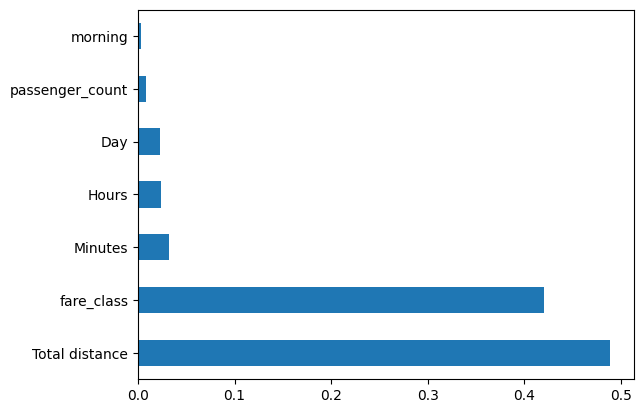

In [40]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [41]:
X.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
0,0,1,2010,4,19,4,17,0,2.126312
1,0,1,2010,4,17,11,43,0,1.392307
2,1,2,2010,4,17,7,23,0,3.326763
3,0,1,2010,4,11,17,25,1,1.864129
4,1,1,2010,4,16,22,19,1,7.231321


In [42]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [44]:
import xgboost

In [45]:
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [46]:
y_pred=regressor.predict(X_test)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
import seaborn as sns

<Axes: xlabel='fare_amount', ylabel='Density'>

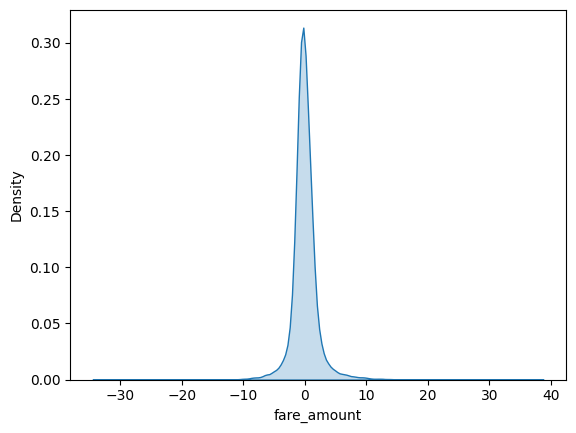

In [51]:
sns.kdeplot(y_test-y_pred, fill=True)

<Axes: xlabel='fare_amount', ylabel='Density'>

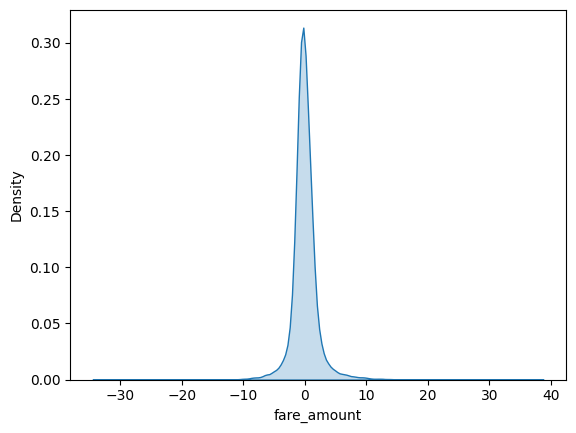

In [52]:
sns.kdeplot(y_test-y_pred, fill=True)

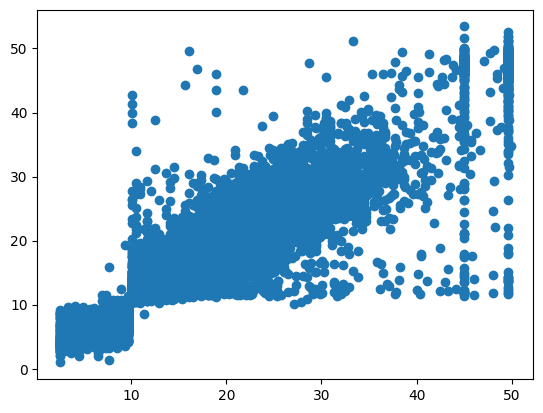

In [53]:
plt.scatter(y_test,y_pred)

In [54]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9379037668296871
MAE: 1.4181402545239528
MSE: 6.883956187783126
RMSE: 2.62372944256513


### Hyper Parameter Training

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [57]:
#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [58]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [59]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgboost.XGBRegressor()

In [60]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [62]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


e:\Major Projects\NY\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Major Projects\NY\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Major Projects\NY\venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "e:\Major Projects\NY\venv\Lib\site-packages\xgboost\sklearn.py", line 1247, in fit
    self._Booster = train(
                    ~~~~~

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'learning_rate': ['0.05', '0.1', ...], 'max_depth': [5, 10, ...], 'min_child_weight': [3, 4, ...], 'n_estimators': [100, 200, ...], ...}"
,n_iter,5
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [63]:
xg_random.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.5'}

In [64]:
y_pred=xg_random.predict(X_test)

<Axes: xlabel='fare_amount', ylabel='Density'>

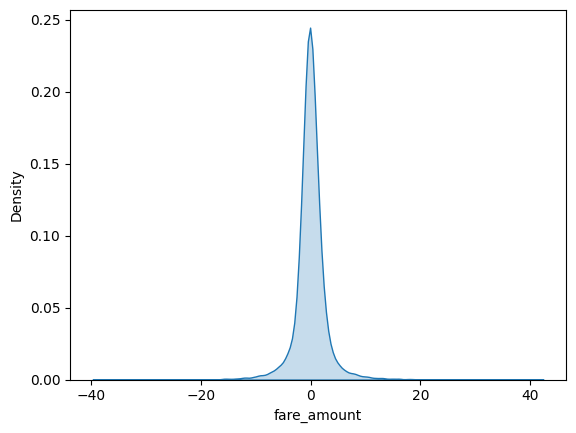

In [65]:
sns.kdeplot(y_test-y_pred, fill=True)

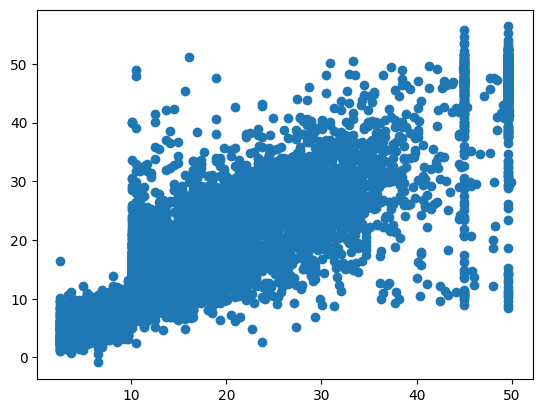

In [66]:
plt.scatter(y_test,y_pred)

In [67]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9039937248481102
MAE: 1.845215047093365
MSE: 10.456967724644096
RMSE: 3.2337235077606894


### ANN (Regression Problem)

In [68]:
X_train.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,morning,Total distance
40090,1,1,2010,4,12,16,17,1,3.181725
90425,0,2,2010,4,18,7,39,0,1.528133
63492,0,1,2010,4,11,18,53,1,4.020180
19581,1,1,2010,4,21,20,51,1,6.338458
39057,1,1,2010,4,14,16,46,1,6.823749


In [69]:
y_train.head()

40090    17.7
90425     4.9
63492     8.1
19581    17.7
39057    15.3
Name: fare_amount, dtype: float64

In [70]:
X_train.shape[1]

9

In [71]:

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [72]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 20)

e:\Major Projects\NY\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,145 (649.00 KB)

 Trainable params: 166,145 (649.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 2.2040 - mean_absolute_error: 2.2040 - val_loss: 1.6112 - val_mean_absolute_error: 1.6112
Epoch 2/20
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 1.7563 - mean_absolute_error: 1.7563 - val_loss: 1.6337 - val_mean_absolute_error: 1.6337
Epoch 3/20
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.7104 - mean_absolute_error: 1.7104 - val_loss: 1.6837 - val_mean_absolute_error: 1.6837
Epoch 4/20
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.6838 - mean_absolute_error: 1.6838 - val_loss: 1.6122 - val_mean_absolute_error: 1.6122
Epoch 5/20
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.6650 - mean_absolute_error: 1.6650 - val_loss: 1.5539 - val_mean_absolute_error: 1.5539
Epoch 6/20
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 1.6390 - mean_absolute_error: 1.6390 - val_loss: 1.5413 - val_mean_absolute_error: 1.5413
Epoch 7/20
5628/5628 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 1.6296 - mean_absol

### Model Evaluation

In [73]:
prediction=NN_model.predict(X_test)

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


<Axes: ylabel='Density'>

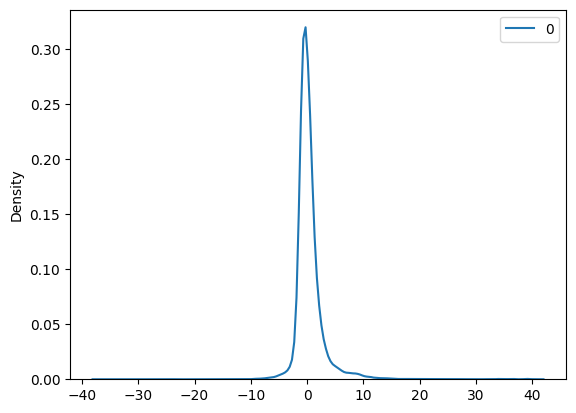

In [74]:
sns.kdeplot(y_test.values.reshape(-1,1)-prediction)

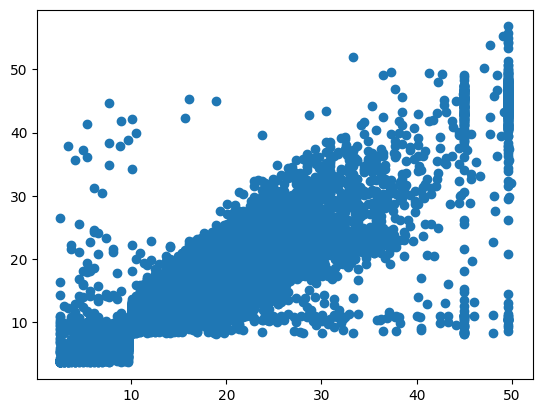

In [75]:
plt.scatter(y_test,prediction)

In [76]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.4877887071800233
MSE: 8.813588956447564
RMSE: 2.968768929446609


### TPOTRegressor Automated Library 

In [101]:
from tpot import TPOTRegressor

In [78]:
regressor=TPOTRegressor()
regressor.fit(X_train,y_train)

Generation: : 1it [1:04:35, 3875.35s/it]
e:\Major Projects\NY\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\Major Projects\NY\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
e:\Major Projects\NY\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
e:\Major Projects\NY\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
e:\Major Projects\NY\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warni

,search_space,<tpot.search_...0014A5CF45BE0>
,scorers,['neg_mean_squared_error']
,scorers_weights,[1]
,cv,10
,other_objective_functions,[]
,other_objective_functions_weights,[]
,objective_function_names,None
,bigger_is_better,True
,categorical_features,None
,memory,None
,preprocessing,False


In [90]:
#tpot = TPOTRegressor(generations=1, population_size=10, verbose=2, random_state=42)
#tpot.fit(X_train, y_train)
#print(tpot.fitted_pipeline_.score(X_test, y_test))
#tpot.export('tpot_taxiFaredocumentation_pipeline.py')

import joblib

tpot = TPOTRegressor(generations=1, population_size=10, verbose=2, random_state=42)
tpot.fit(X_train, y_train)

print(tpot.fitted_pipeline_.score(X_test, y_test))

# Save the trained model to a file
joblib.dump(tpot.fitted_pipeline_, 'tpot_taxi_fare_pipeline.pkl')

e:\Major Projects\NY\venv\Lib\site-packages\tpot\tpot_estimator\estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
Generation: 100%|██████████| 1/1 [1:01:02<00:00, 3662.17s/it]


0.8829126311166167


e:\Major Projects\NY\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


['tpot_taxi_fare_pipeline.pkl']

In [113]:
import numpy as np
if not hasattr(np, "float"):
    np.float = float
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
#from tpot.builtins import StackingEstimator
#from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv(r"E:\Major Projects\NY\data\final_data.csv", sep=',', dtype=np.float64)
features = tpot_data.drop('fare_amount', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['fare_amount'], random_state=42)


In [115]:
# Average CV score on the training set was: -6.6694533560074545
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=16, n_estimators=100)),
    ElasticNetCV(l1_ratio=0.45, tol=0.001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

e:\Major Projects\NY\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
e:\Major Projects\NY\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [116]:
results

array([ 4.45318563,  7.24627163,  6.64175583, ...,  7.25530353,
       13.1392953 ,  7.11247282], shape=(30000,))

In [117]:
training_target

84145      9.7
60838     16.5
99429      4.9
26258     10.5
12165     15.7
          ... 
110268     8.9
119879     4.1
103694    14.1
860        6.1
15795      4.9
Name: fare_amount, Length: 90000, dtype: float64

<Axes: ylabel='Density'>

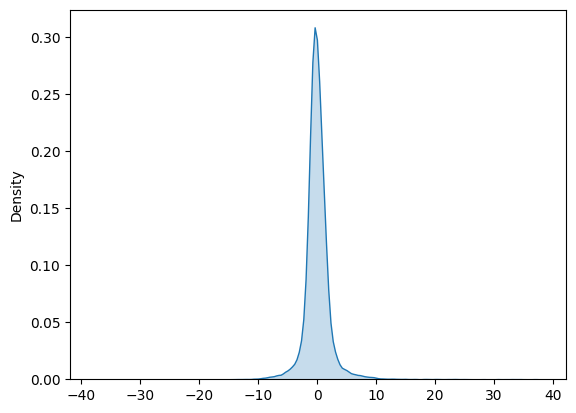

In [118]:
sns.kdeplot(testing_target.values-results, fill=True)

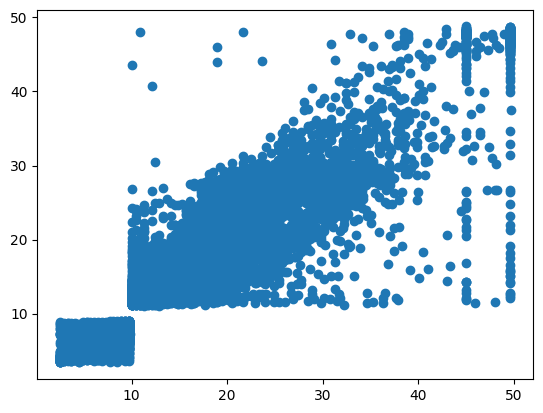

In [119]:
import matplotlib.pyplot as plt
plt.scatter(testing_target,results)

In [120]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(testing_target, results))
print('MSE:', metrics.mean_squared_error(testing_target, results))
print('RMSE:', np.sqrt(metrics.mean_squared_error(testing_target, results)))

MAE: 1.4024733378171717
MSE: 6.307831130788922
RMSE: 2.5115395937131715


## Classification Model

In [131]:
df=pd.read_csv(r'E:\Major Projects\NY\data\final_data.csv',index_col=False)
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [132]:
X=df.iloc[:,[0,2,3,4,5,6,7,8,9]]
y=df.iloc[:,1]

In [133]:
X

,fare_amount,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,6.5,1,2010,4,19,4,17,0,2.126312
1,6.9,1,2010,4,17,11,43,0,1.392307
2,10.1,2,2010,4,17,7,23,0,3.326763
3,8.9,1,2010,4,11,17,25,1,1.864129
4,19.7,1,2010,4,16,22,19,1,7.231321
...,...,...,...,...,...,...,...,...,...
119995,15.3,1,2010,4,18,10,33,0,5.751348
119996,15.3,1,2010,4,23,6,27,0,5.767444
119997,12.5,3,2010,4,18,14,50,1,5.052523
119998,4.9,1,2010,4,13,4,14,0,1.208923


In [134]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119995    1
119996    1
119997    1
119998    0
119999    0
Name: fare_class, Length: 120000, dtype: int64

In [135]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


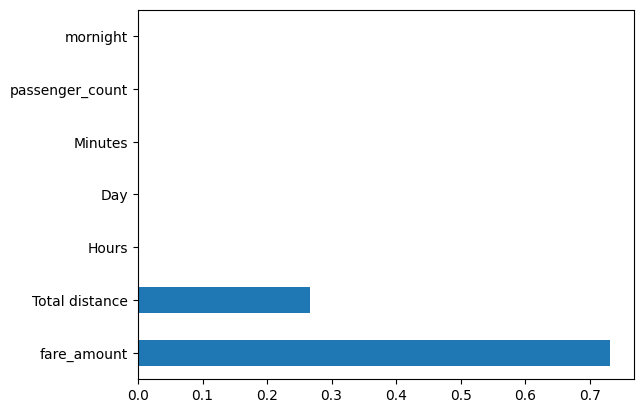

In [136]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [137]:
X.head()

,fare_amount,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,6.5,1,2010,4,19,4,17,0,2.126312
1,6.9,1,2010,4,17,11,43,0,1.392307
2,10.1,2,2010,4,17,7,23,0,3.326763
3,8.9,1,2010,4,11,17,25,1,1.864129
4,19.7,1,2010,4,16,22,19,1,7.231321


In [138]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: fare_class, dtype: int64

In [139]:
y.value_counts()

fare_class
0    80000
1    40000
Name: count, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [143]:
y_pred=classifier.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print(score)

[[24023     0]
 [    0 11977]]
1.0


### HyperParameter Training

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [147]:
#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

In [148]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf':min_samples_leaf,
              'min_samples_split':min_samples_split}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10, 15, 100]}


In [149]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
classifier=RandomForestClassifier()

In [150]:
classifier.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [151]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,scoring='accuracy', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [152]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [153]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_depth': 25}

In [154]:
y_pred=rf_random.predict(X_test)

In [155]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print(score)

[[24023     0]
 [    0 11977]]
1.0
